Reference:

- Data source:
    <https://data.worldbank.org/topic/climate-change?end=2018&start=1973>
- Custom scatterplot colors with colorbar in Matplotlib:
    <https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


In [2]:
climate_1960_2018 = pd.read_csv('datasets/climate_1960_2018.csv')
climate_1960_2018.drop(columns='Unnamed: 63', inplace=True)

In [3]:
climate_1960_2018.shape

(20064, 63)

In [4]:
indicators = ['Population, total',
              'Population growth (annual %)',
              # greenhouse gas
              'CO2 emissions (kt)',
              'CO2 emissions (metric tons per capita)',
              'Methane emissions (kt of CO2 equivalent)',
              'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
              'SF6 gas emissions (thousand metric tons of CO2 equivalent)',
              'PFC gas emissions (thousand metric tons of CO2 equivalent)',
              'HFC gas emissions (thousand metric tons of CO2 equivalent)',
              'Total greenhouse gas emissions (kt of CO2 equivalent)',
              
              'Electric power consumption (kWh per capita)',
              'Energy use (kg of oil equivalent per capita)',
              'Forest area (% of land area)',
              'Forest area (sq. km)',
              'Agricultural land (% of land area)']

climate_filtered_1960_2018 = climate_1960_2018[climate_1960_2018['Indicator Name'].isin(indicators)]
climate_filtered_1960_2018.fillna(0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
climate_filtered_1960_2018.drop(columns=['Country Code', 'Indicator Code'], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
def df_4each_indicator(glb_df, indicator):
    df = glb_df[glb_df['Indicator Name'] == indicator]
    df.index = df['Country Name']
    df.drop(columns=['Country Name', 'Indicator Name'], inplace=True)
    df = df.T
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    return df

In [7]:
pop_tot_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                       'Population, total')
pop_growthPct_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                             'Population growth (annual %)')

co2_kt_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                      'CO2 emissions (kt)')
co2_tons_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'CO2 emissions (metric tons per capita)')
methane_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                       'Methane emissions (kt of CO2 equivalent)')
n2o_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')
sf6_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'SF6 gas emissions (thousand metric tons of CO2 equivalent)')
pfc_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'PFC gas emissions (thousand metric tons of CO2 equivalent)')
hfc_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'HFC gas emissions (thousand metric tons of CO2 equivalent)')
greenhouse_gas_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                              'Total greenhouse gas emissions (kt of CO2 equivalent)')

elec_power_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                          'Electric power consumption (kWh per capita)')
energy_use_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                          'Energy use (kg of oil equivalent per capita)')
forest_areaPct_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                              'Forest area (% of land area)')
forest_areaSQ_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                             'Forest area (sq. km)')
agric_landPct_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                             'Agricultural land (% of land area)')

## About population

In [8]:
def billions(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-9)

FORMATTER_BILLIONS = FuncFormatter(billions)

# YRS = mdates.YearLocator()
# YRFMT = mdates.DateFormatter('%Y')

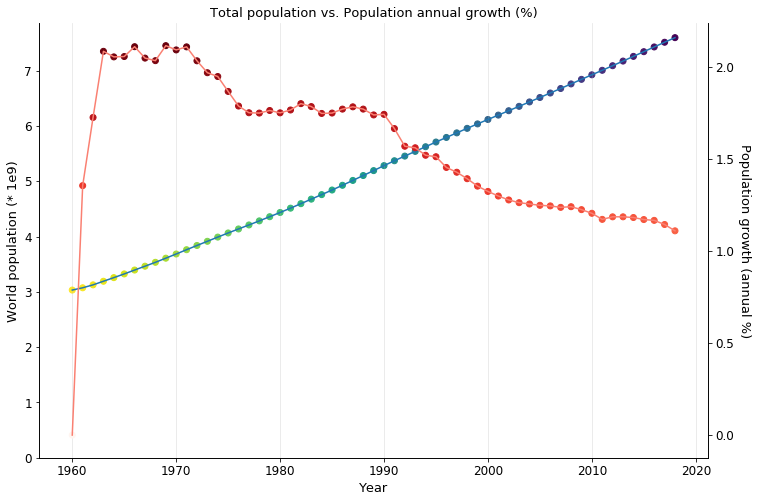

In [9]:
# plt.figure(figsize=(9, 6))
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
axarr.set_title('Total population vs. Population annual growth (%)', fontdict={'fontsize': 13})

cmap_pop = matplotlib.cm.get_cmap('viridis_r')
cmap_popPct = matplotlib.cm.get_cmap('Reds')

normalize_pop = matplotlib.colors.Normalize(vmin=min(pop_tot_1960_2018['World']),
                                            vmax=max(pop_tot_1960_2018['World']))
colors_pop = [cmap_pop(normalize_pop(value)) for value in list(pop_tot_1960_2018['World'].values)]

normalize_popPct = matplotlib.colors.Normalize(vmin=min(pop_growthPct_1960_2018['World']),
                                               vmax=max(pop_growthPct_1960_2018['World']))
colors_popPct = [cmap_popPct(normalize_popPct(value)) for value in list(pop_growthPct_1960_2018['World'].values)]


axarr.plot(pop_tot_1960_2018.index,
           pop_tot_1960_2018['World'])

axarr.scatter(pop_tot_1960_2018.index,
              pop_tot_1960_2018['World'],
              color=colors_pop)

axarr_02 = axarr.twinx()
axarr_02.plot(pop_growthPct_1960_2018.index,
              pop_growthPct_1960_2018['World'],
              color='salmon')
axarr_02.scatter(pop_growthPct_1960_2018.index,
                 pop_growthPct_1960_2018['World'],
                 color=colors_popPct)

axarr.tick_params(axis='both', labelsize=12)
axarr.set_xlabel('Year', size=13)
axarr.set_ylabel('World population (* 1e9)', size=13)
axarr.set_ylim(bottom=0)
axarr.yaxis.set_major_formatter(FORMATTER_BILLIONS)
axarr.spines['top'].set_visible(False)

axarr_02.tick_params(axis='both', labelsize=12)
axarr_02.set_ylabel('Population growth (annual %)', rotation=270, labelpad=17, size=13)
axarr_02.spines['top'].set_visible(False)
axarr.grid(alpha=0.3, axis='x')


The graph above describes the world's total population and population annual growth from 1960 to 2018. During nearly 60 years, total population increases 150%; especially between 1963 and 1973, the population annual growth is higher than or equal to 2%, and keeps around 1.7% annual increasing until to 1990, then the population increasing has slowed down since nearly 30 years, for the last 8 years, the annual inceasing is around 1.2%.

TODO:
- 1 line plot for greenhouse_gas_1960_2018, methane_1960_2018, co2_kt_1960_2018
- 1 line plot for co2_tons_1960_2018, n2o_1960_2018, sf6_1960_2018, pfc_1960_2018, hfc_1960_2018
- 1 line plot for elec_power_1960_2018
- 1 line plot for energy_use_1960_2018
- 1 line plot for forest_areaPct_1960_2018 & forest_areaSQ_1960_2018
- 1 line plot for agric_landPct_1960_2018